# Persistent homology of correlation networks 

In [2]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
import os, sys

Let's use some fun data!   
In the directory below you find timeseries for a 100 subjects for two recordings. 
They have been studied in [this](http://www.gipsa-lab.grenoble-inp.fr/~sophie.achard/Brain_connectivity_network) paper about test-retest reliability of brain functional networks. 

In [17]:
# here you can find timeseries for a 100 subjects for test and retest 
data_dir = '../data/corr-mats/TimeSeriesAAL/'

fs = os.listdir(data_dir)
ts_data = {}
subs = []
for f in fs:
    if f[0]!='.':
        sub = f.split('_')[1]
        subs.append(sub)
        test = int(f.split('_')[3][-1]);
        if sub not in ts_data:
            ts_data[sub] = {}
        ts_data[sub][test] = np.loadtxt(data_dir+f)

In [16]:
fs

['.DS_Store']

We can calculate correlation matrices the easy way:

In [7]:
corr_dict = {}

for sub in ts_data:
    corr_dict[sub] = {}
    for test in ts_data[sub]:
        corr_dict[sub][test] = np.corrcoef(ts_data[sub][test].T)

In [8]:
from ripser import Rips
from persim import PersImage

In [9]:
rips = Rips(maxdim=1, coeff=2, do_cocycles=False,thresh=2);
diagrams_h1 = []
labels = []
for test in [0,1]:
    for i,sub in enumerate(corr_dict):
        labels.append(test);
        # note that we use 1-corr because these are pearson correlations and hence 
        # this is a proper metric
        dist = 1.0 - corr_dict[sub][test]
        diagrams_h1.append(rips.fit_transform(dist,distance_matrix=True)[1]) #don't forget the distance matrix flag!


Rips(maxdim=1, thresh=2, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


IndexError: list index out of range

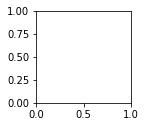

In [11]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plot_diagrams(diagrams_h1[i])
    plt.ylim(0,1)
    plt.xlim(0,1)

plt.tight_layout()

In [12]:
diagrams_h1

[]

# Distance matrices 

In [ ]:
dgms = {}
for i,sub in enumerate(corr_dict):
    dgms[sub] = []
    for test in [0,1]:
        dgms[sub].append(rips.fit_transform(1.0 - corr_dict[sub][test],distance_matrix=True)[1])

## Wasserstein distances inter- and intra-subjects

In [ ]:
from itertools import combinations;
inter_dist = {}
intra_dist = {}

for s, ss in combinations(corr_dict.keys(),2):
    if s not in intra_dist:
        intra_dist[s] = persim.sliced_wasserstein(dgms[s][0],dgms[s][1],300);
        inter_dist[s] = []
    if ss not in intra_dist:
        intra_dist[ss] = persim.sliced_wasserstein(dgms[ss][0],dgms[ss][1],300);
        inter_dist[ss] = [];
    d = persim.sliced_wasserstein(dgms[s][0],dgms[ss][1],300);
    inter_dist[s].append(d);
    d = persim.sliced_wasserstein(dgms[s][1],dgms[ss][0],300);
    inter_dist[ss].append(d);
    
    

In [ ]:
x =  list(map(lambda x: intra_dist[x], corr_dict.keys()))
y = list(map(lambda x: np.mean(inter_dist[x]), corr_dict.keys()))
yerr = list(map(lambda x: np.std(inter_dist[x]), corr_dict.keys()))

plt.plot(x,y,'o')
plt.errorbar(x,y,yerr,fmt='.')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10),'k--')
print(np.sum([np.array(x)<np.array(y)]))

## Bottleneck distances inter- and intra-subjects

In [ ]:
inter_dist_b = {}
intra_dist_b = {}

for s, ss in combinations(corr_dict.keys(),2):
    if s not in intra_dist_b:
        intra_dist_b[s] = persim.bottleneck(dgms[s][0],dgms[s][1]);
        inter_dist_b[s] = []
    if ss not in intra_dist_b:
        intra_dist_b[ss] = persim.bottleneck(dgms[ss][0],dgms[ss][1]);
        inter_dist_b[ss] = [];
    d = persim.bottleneck(dgms[s][0],dgms[ss][1]);
    inter_dist_b[s].append(d);
    d = persim.bottleneck(dgms[s][1],dgms[ss][0]);
    inter_dist_b[ss].append(d);

    

In [ ]:
x =  list(map(lambda x: intra_dist_b[x], corr_dict.keys()))
y = list(map(lambda x: np.mean(inter_dist_b[x]), corr_dict.keys()))
yerr = list(map(lambda x: np.std(inter_dist_b[x]), corr_dict.keys()))

plt.plot(x,y,'o')
plt.errorbar(x,y,yerr,fmt='.')
plt.plot(np.linspace(0,0.09,10), np.linspace(0,0.09,10),'k--')
print(np.sum([np.array(x)<np.array(y)]))

## Heat kernel sims inter- and intra-subjects

In [ ]:
inter_dist_h = {}
intra_dist_h = {}

for s, ss in combinations(corr_dict.keys(),2):
    if s not in intra_dist_h:
        intra_dist_h[s] = persim.heat(dgms[s][0],dgms[s][1]);
        inter_dist_h[s] = []
    if ss not in intra_dist_h:
        intra_dist_h[ss] = persim.heat(dgms[ss][0],dgms[ss][1]);
        inter_dist_h[ss] = [];
    d = persim.heat(dgms[s][0],dgms[ss][1]);
    inter_dist_h[s].append(d);
    d = persim.heat(dgms[s][1],dgms[ss][0]);
    inter_dist_h[ss].append(d);

    

In [ ]:
x =  list(map(lambda x: intra_dist_h[x], corr_dict.keys()))
y = list(map(lambda x: np.mean(inter_dist_h[x]), corr_dict.keys()))
yerr = list(map(lambda x: np.std(inter_dist_h[x]), corr_dict.keys()))

plt.plot(x,y,'o')
plt.errorbar(x,y,yerr,fmt='.')
plt.plot(np.linspace(0,0.09,10), np.linspace(0,0.09,10),'k--')
print(np.sum([np.array(x)<np.array(y)]))

In [ ]:
inter_dist_hr = {}
intra_dist_hr = {}

self_hr = {}
for sub in subs:
    self_hr[sub] = list(map(lambda x: persim.heat(dgms[sub][x], dgms[sub][x]), [0,1]))

for s, ss in combinations(subs,2):
    if s not in intra_dist_hr:
        intra_dist_hr[s] = 2.0* persim.heat(dgms[s][0],dgms[s][1])/(self_hr[s][0] + self_hr[s][1]);
        inter_dist_hr[s] = []
    if ss not in intra_dist_hr:
        intra_dist_hr[ss] = 2.0*persim.heat(dgms[ss][0],dgms[ss][1])/(self_hr[ss][0] + self_hr[ss][1]);
        inter_dist_hr[ss] = [];
    d = 2.0*persim.heat(dgms[s][0],dgms[ss][1])/(self_hr[s][0] + self_hr[ss][1]);
    inter_dist_hr[s].append(d);
    d = 2.0 * persim.heat(dgms[s][1],dgms[ss][0])/(self_hr[s][1] + self_hr[ss][0]);
    inter_dist_hr[ss].append(d);


In [ ]:
x =  list(map(lambda x: intra_dist_hr[x], subs))
y = list(map(lambda x: np.mean(inter_dist_hr[x]),subs))
yerr = list(map(lambda x: np.std(inter_dist_hr[x]), subs))

plt.plot(x,y,'o')
plt.errorbar(x,y,yerr,fmt='.')
plt.plot(np.linspace(0,0.09,10), np.linspace(0,0.09,10),'k--')
print(np.sum([np.array(x)<np.array(y)]))

# Classification? 

In [ ]:
pim = PersImage(pixels=([30,30]), spread=None)
imgs = pim.transform(diagrams_h1)

plt.figure(figsize=(20,20))

for i in range(100):
    plt.subplot(10,10,i+1)
    pim.show(imgs[i])


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

imgs_array = np.array([img.flatten() for img in imgs])
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels, test_size=0.40, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

inverse_image = np.copy(lr.coef_).reshape((30,30))
plt.figure()
pim.show(inverse_image)